In [1]:
import pandas as pd

ECLO_df = pd.read_csv('train.csv')

# <span style="color: violet;"> 데이터 살펴 보기 </span>

In [2]:
ECLO_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [3]:
ECLO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

### 22개 columns 과 39609개의 row를 갖고 있음.
### 피해 운전자 차종, 성별, 연령, 상해정도가 38618개의 row로 <span style="color: red;">991개의 차이</span>가나나 
### 혼자 사고난 거라 볼 수 있으므로 결측치 처리하면 안됨. 

# <span style="color: violet;"> 데이터 가공</span>

### 학습/예측/평가 에 필요없는 칼럼을 제거해보자.
### ELCO 수치에 직접적으로 연관없는 Columns은 test.csv파일기준으로 
### <span style="color: red;">(사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형) 을 제외한</span>
## 'ID', '사고유형 - 세부분류', '법규위반', 가해운전자 차종', '가해운전자 성별', '가해운전자 연령'
## '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
## '피해운전자 상해정도', '사망자수', '중상자수', '경상자수' ,  '부상자수'
### 라 할 수 있다. 이를 제거하자.

In [4]:
ECLO_df.drop(['ID','사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도','피해운전자 차종', '피해운전자 성별','피해운전자 연령', '피해운전자 상해정도','사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [5]:
ECLO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    39609 non-null  object
 1   요일      39609 non-null  object
 2   기상상태    39609 non-null  object
 3   시군구     39609 non-null  object
 4   도로형태    39609 non-null  object
 5   노면상태    39609 non-null  object
 6   사고유형    39609 non-null  object
 7   ECLO    39609 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


## 이제 각각의 데이터를 살펴보자.
### 또한, 학습/예측/평가를 하기 위해서는 수치형 데이터로 인코딩 되어야 하므로 이를 수치화 시킨다.

In [6]:
ECLO_df['사고일시']

0        2019-01-01 00
1        2019-01-01 00
2        2019-01-01 01
3        2019-01-01 02
4        2019-01-01 04
             ...      
39604    2021-12-31 19
39605    2021-12-31 19
39606    2021-12-31 21
39607    2021-12-31 22
39608    2021-12-31 23
Name: 사고일시, Length: 39609, dtype: object

### 년 월 일 시 로 되어있다. 이를 각각 나눠 columns로 다시 추가해주자.

In [7]:
#문자열을 datetime 타입으로 변경
ECLO_df['사고일시']=ECLO_df.사고일시.apply(pd.to_datetime)

#datetime 타입에서 년, 월, 일, 시간 추출
ECLO_df['year']=ECLO_df.사고일시.apply(lambda x : x.year)
ECLO_df['month']=ECLO_df.사고일시.apply(lambda x : x.month)
ECLO_df['day']=ECLO_df.사고일시.apply(lambda x : x.day)
ECLO_df['hour']=ECLO_df.사고일시.apply(lambda x : x.hour)
ECLO_df.head(3)

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour
0,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0
1,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0
2,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1


In [8]:
ECLO_df.drop('사고일시', axis=1, inplace = True)

In [9]:
ECLO_df.head(3)

,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour
0,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0
1,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0
2,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1


In [10]:
ECLO_df['시군구']

0           대구광역시 중구 대신동
1          대구광역시 달서구 감삼동
2          대구광역시 수성구 두산동
3           대구광역시 북구 복현동
4           대구광역시 동구 신암동
              ...       
39604    대구광역시 수성구 수성동3가
39605      대구광역시 달서구 상인동
39606      대구광역시 달서구 월성동
39607       대구광역시 달서구 장동
39608       대구광역시 서구 비산동
Name: 시군구, Length: 39609, dtype: object

## 대구광역시는 공통적이므로 지우고 구와 동을 분리하자.

In [11]:
ECLO_df[['시', '구', '동']] = ECLO_df['시군구'].str.split(expand=True)
ECLO_df.drop('시', axis=1, inplace=True) # '시' 열 제거

In [12]:
ECLO_df.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour,구,동
0,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0,중구,대신동
1,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0,달서구,감삼동
2,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1,수성구,두산동
3,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,5,2019,1,1,2,북구,복현동
4,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,3,2019,1,1,4,동구,신암동


### 이제 시군구 컬럼은 삭제 해주자.

In [13]:
ECLO_df.drop('시군구', axis=1, inplace = True)

In [14]:
ECLO_df['도로형태']  

0               단일로 - 기타
1               단일로 - 기타
2               단일로 - 기타
3               단일로 - 기타
4               단일로 - 기타
              ...       
39604         교차로 - 교차로안
39605           단일로 - 기타
39606         교차로 - 교차로안
39607            기타 - 기타
39608    단일로 - 지하차도(도로)내
Name: 도로형태, Length: 39609, dtype: object

### 단일로에서도 기타와 지하차도(도로)내가 분리되어 있다 이를 분리하자

In [15]:
ECLO_df[['대분류', '소분류']] = ECLO_df['도로형태'].str.split(' - ', expand=True)

### 이제 도로형태 컬럼은 삭제 해주자.

In [16]:
ECLO_df.drop('도로형태', axis=1, inplace = True)

In [17]:
ECLO_df.head()

,요일,기상상태,노면상태,사고유형,ECLO,year,month,day,hour,구,동,대분류,소분류
0,화요일,맑음,건조,차대사람,5,2019,1,1,0,중구,대신동,단일로,기타
1,화요일,흐림,건조,차대사람,3,2019,1,1,0,달서구,감삼동,단일로,기타
2,화요일,맑음,건조,차대사람,3,2019,1,1,1,수성구,두산동,단일로,기타
3,화요일,맑음,건조,차대차,5,2019,1,1,2,북구,복현동,단일로,기타
4,화요일,맑음,건조,차대차,3,2019,1,1,4,동구,신암동,단일로,기타


## 보기 좋게 하기 위해 target값 (ECLO)을 오른쪽으로 옮기자

In [18]:
col_to_move = ECLO_df['ECLO']
ECLO_df.drop(labels=['ECLO'], axis=1, inplace=True)
ECLO_df['ECLO'] = col_to_move

In [19]:
ECLO_df.head()

,요일,기상상태,노면상태,사고유형,year,month,day,hour,구,동,대분류,소분류,ECLO
0,화요일,맑음,건조,차대사람,2019,1,1,0,중구,대신동,단일로,기타,5
1,화요일,흐림,건조,차대사람,2019,1,1,0,달서구,감삼동,단일로,기타,3
2,화요일,맑음,건조,차대사람,2019,1,1,1,수성구,두산동,단일로,기타,3
3,화요일,맑음,건조,차대차,2019,1,1,2,북구,복현동,단일로,기타,5
4,화요일,맑음,건조,차대차,2019,1,1,4,동구,신암동,단일로,기타,3


# <span style="color: violet;"> 데이터 시각화</span>

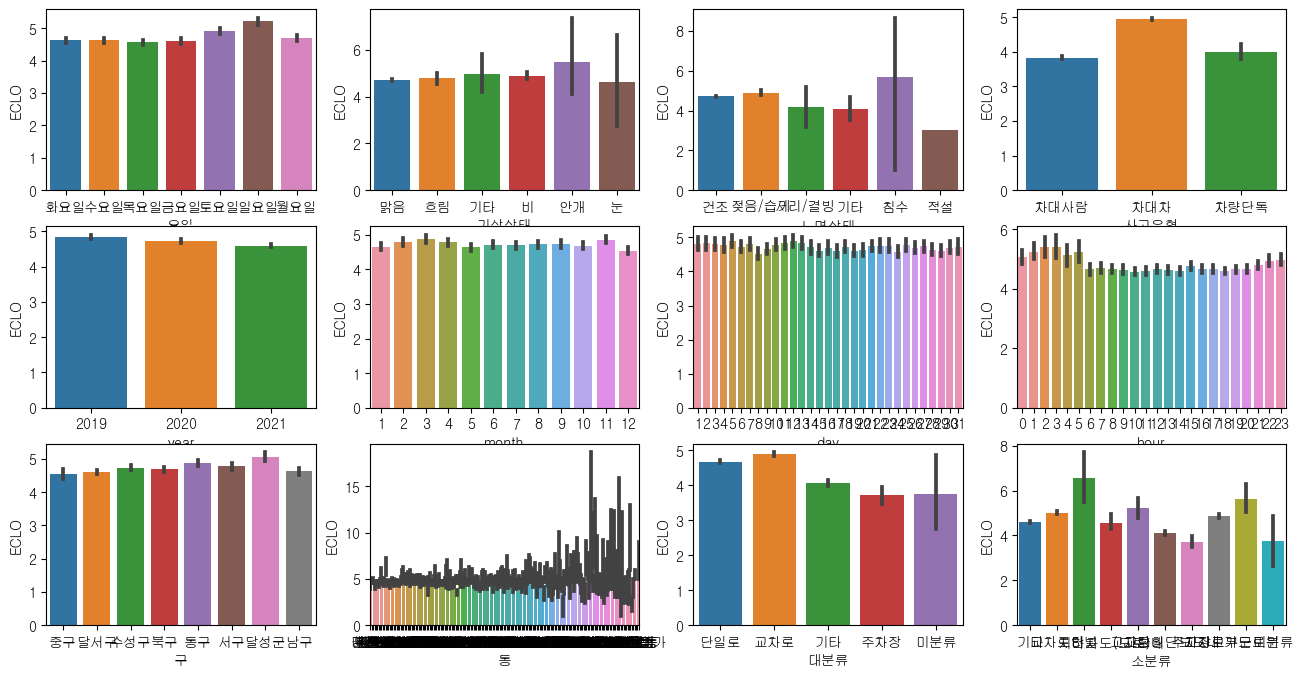

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Gulim'

fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows =3)
cat_features = ['요일', '기상상태','노면상태', '사고유형', 'year','month', 'day', 'hour','구','동', '대분류','소분류']
#cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row=int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y = 'ECLO', data=ECLO_df, ax=axs[row][col])

### 문자형 피처 수치화 하기위해 원핫 인코딩 하자

In [21]:
ECLO_df_ohe=pd.get_dummies(ECLO_df)

# <span style="color: violet;"> 데이터 가공

<Axes: >

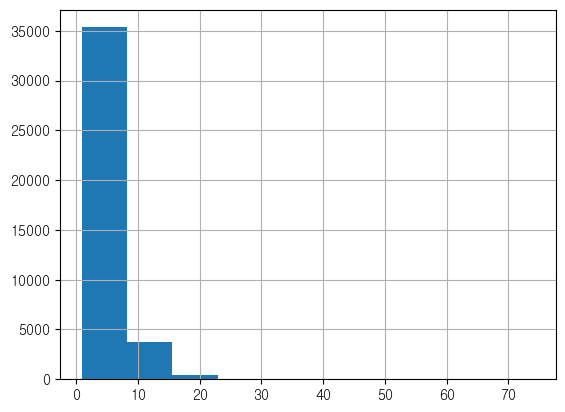

In [22]:
y_target = ECLO_df_ohe['ECLO']
X_features = ECLO_df_ohe.drop(['ECLO'],axis=1, inplace=False)

y_target.hist()

## 긴꼬리 형태를 가지고 있다. 이상치를 처리해주자.

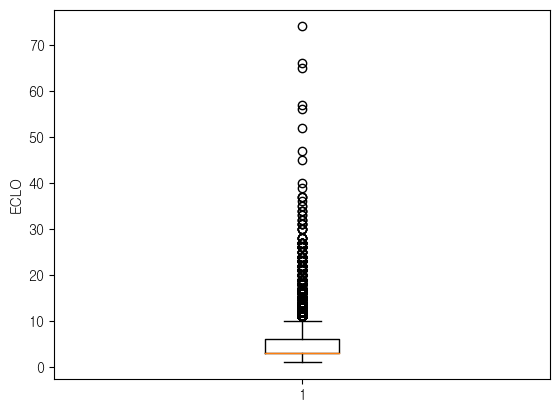

In [23]:
plt.boxplot(y_target)

plt.ylabel('ECLO') 

plt.show()

In [24]:
# ECLO 값이 10 초과 20이하인 항목의 개수 계산
count = ECLO_df_ohe[(ECLO_df_ohe['ECLO'] > 10) & (ECLO_df_ohe['ECLO'] <= 20)].shape[0]

count

1970

In [25]:
# ECLO 값이 20초과인 항목의 개수 계산
count = ECLO_df_ohe[(ECLO_df_ohe['ECLO'] > 20)].shape[0]

count

154

In [26]:
# ECLO 값이 20초과인 항목의 개수 계산
count = ECLO_df_ohe[(ECLO_df_ohe['ECLO'] > 10)].shape[0]

count

2124

### 10초과인 값들은 평균값으로 바꿔주자.

In [27]:
eclo_mean =y_target.mean() 
eclo_mean

4.726703526976192

In [28]:
y_target_transform = y_target.copy()
y_target_transform[y_target > 10] = eclo_mean

In [29]:
y_target_transform.unique()

array([ 5.        ,  3.        ,  6.        ,  4.72670353,  9.        ,
        8.        ,  2.        ,  1.        ,  7.        ,  4.        ,
       10.        ])

<Axes: >

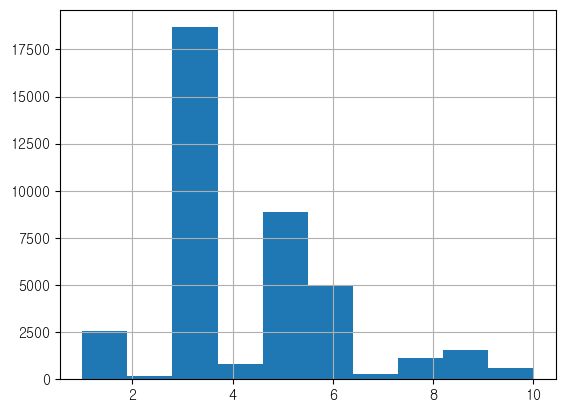

In [30]:
y_target_transform.hist()

### 타겟값을 로그화 시켜 정규 분포화 시켜주자

<Axes: >

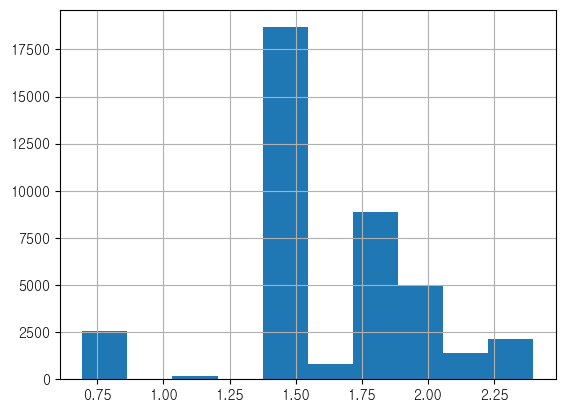

In [31]:
y_log_transform = np.log1p(y_target_transform)
y_log_transform.hist()

<Axes: >

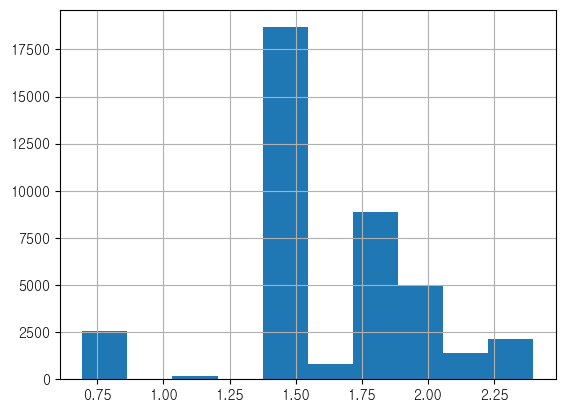

In [32]:
y_log_transform.hist()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def get_rmse(model):
    pred = model.predict(X_test)
    mse=mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#log 값 변환 시 Nan등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val =rmsle(y,pred)
    rmse_val=rmse(y,pred)
    #MAE 는 사이킷런의 mean_absolute_error()로 계산
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3F}, MAE:{2:.3F}'.format(rmsle_val,rmse_val,mae_val))
    
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)

    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
#모델별로 평가 수행
lr_reg=LinearRegression()
ridge_reg=Ridge()
lasso_reg=Lasso()

In [34]:
# ECLO_df_ohe 데이터프레임에서 'ECLO' 칼럼의 값이 10보다 큰 항목을 찾음
mask = ECLO_df_ohe['ECLO'] > 10

# 해당 항목들의 평균값을 계산
mean_value = ECLO_df_ohe.loc[mask, 'ECLO'].mean()

# 'ECLO' 칼럼에서 값이 10보다 큰 항목을 평균값으로 대체
ECLO_df_ohe.loc[mask, 'ECLO'] = mean_value

# 'ECLO' 칼럼의 값들을 np.log1p()로 변환
ECLO_df_ohe['ECLO'] = np.log1p(ECLO_df_ohe['ECLO'])

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = ECLO_df_ohe['ECLO']
X_features = ECLO_df_ohe.drop(['ECLO'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3,
                                                   random_state=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test)

### LinearRegression ###
RMSLE:0.172, RMSE:0.447, MAE:0.356
### Ridge ###
RMSLE:0.172, RMSE:0.447, MAE:0.355
### Lasso ###
RMSLE:0.174, RMSE:0.452, MAE:0.361


In [37]:
def get_top_bottom_coef(model, n=10):
    #coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

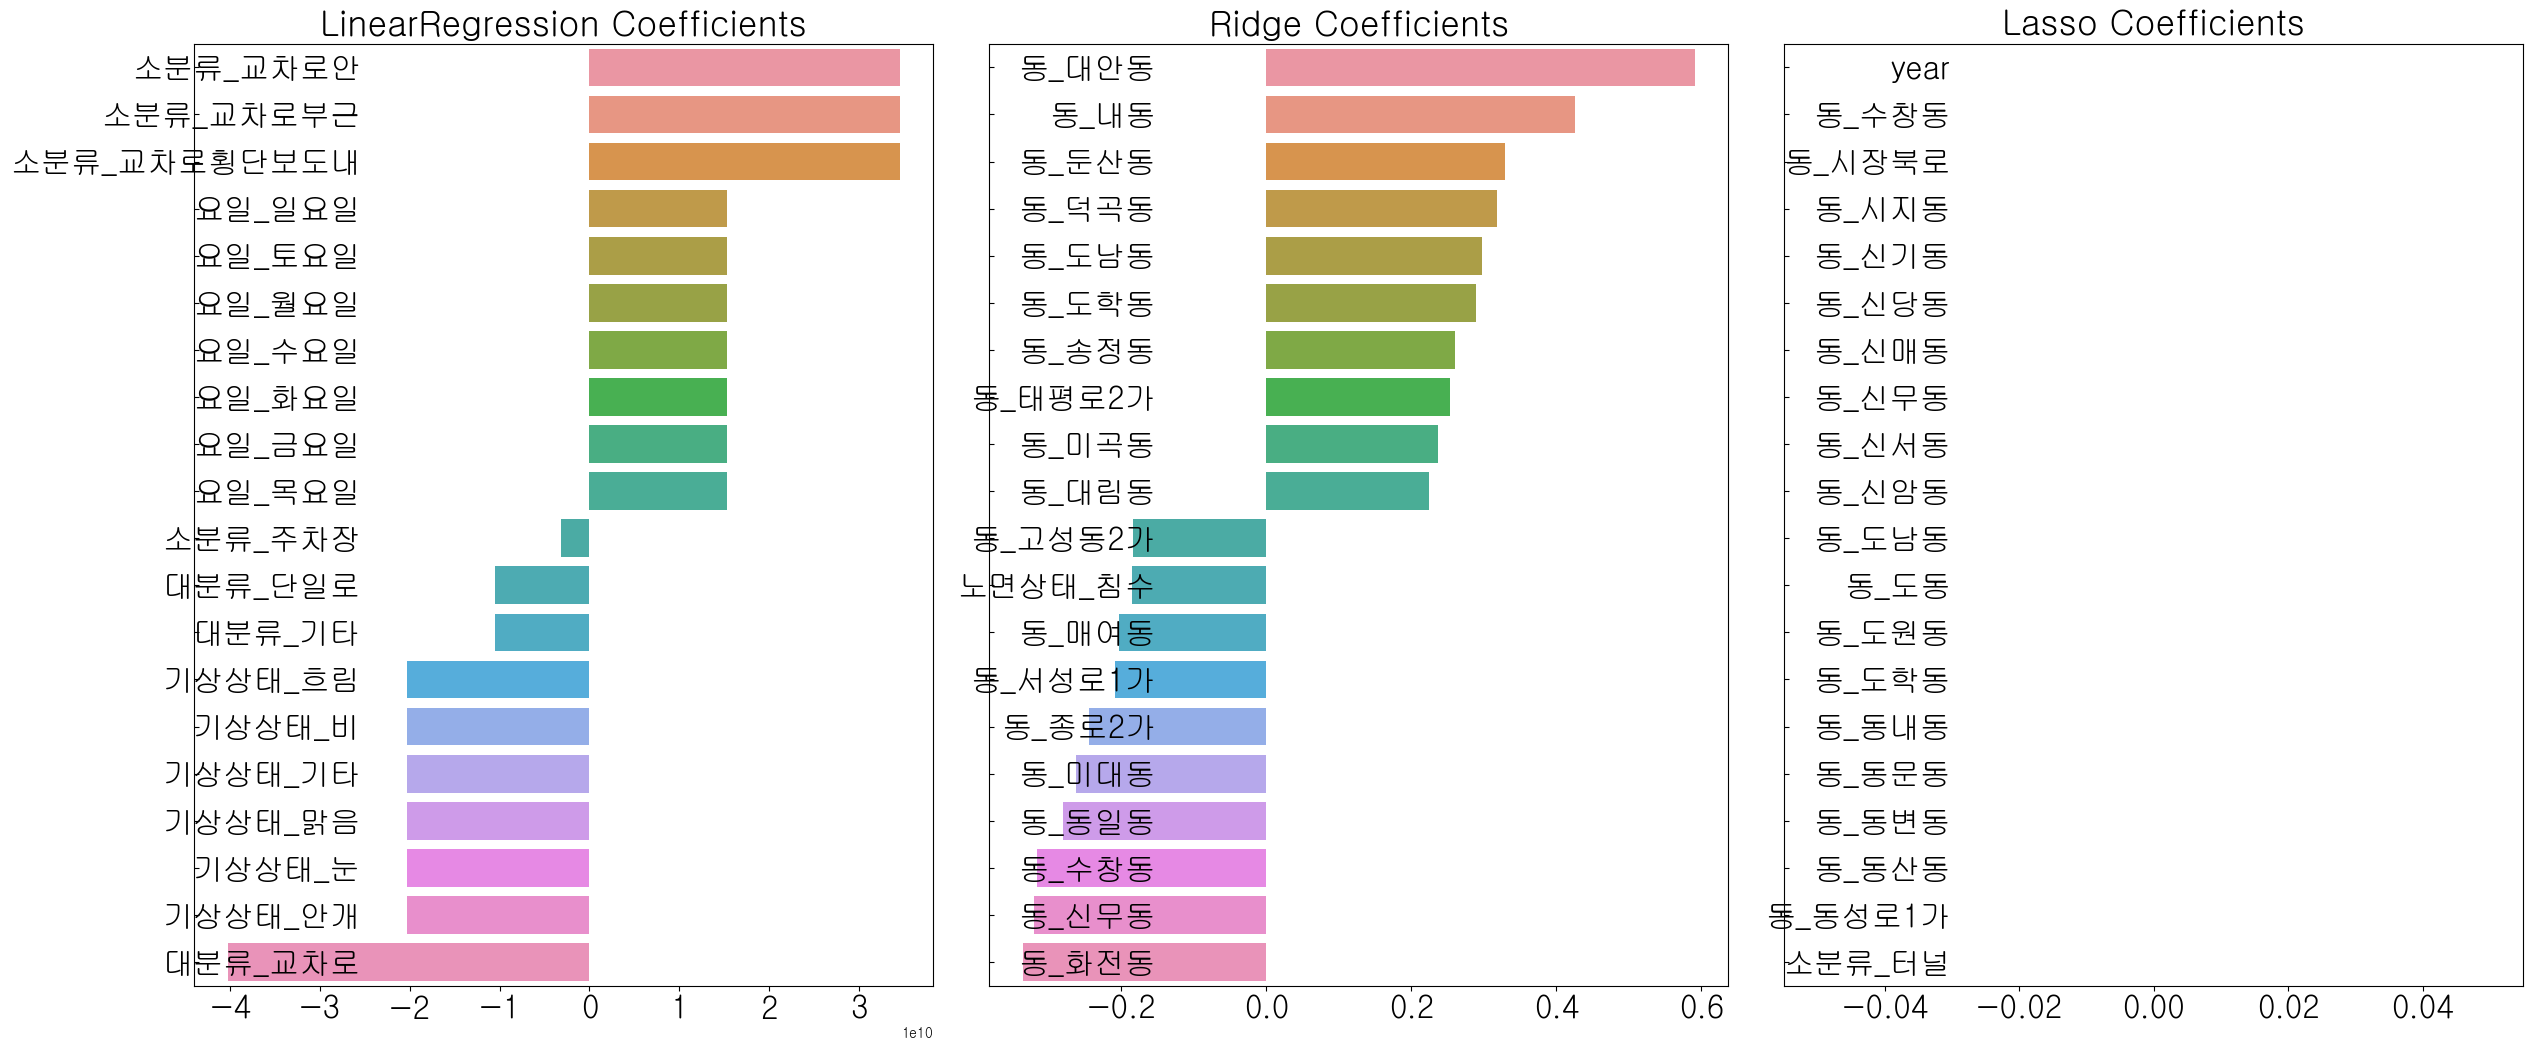

In [38]:
def visualize_coefficient(models):
    #3개의 회귀 모델의 시각화를 위헤 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출해 회귀계수시각화
    # models 리스트에 있는 모든 회귀 모델을 순회합니다.
    for i_num, model in enumerate(models):
        # 해당 모델의 상위 10개 및 하위 10개 회귀 계수를 가져옵니다.
        # get_top_bottom_coef 함수는 모델을 인자로 받아 두 개의 시리즈(상위 10개, 하위 10개 회귀 계수)를 반환합니다.
        coef_high, coef_low = get_top_bottom_coef(model)

        # 상위 10개와 하위 10개 회귀 계수를 결합합니다.
        # pd.concat 함수는 여러 개의 pandas 객체를 축을 따라 결합합니다. 여기서는 상위와 하위 계수를 세로로 결합합니다.
        coef_concat = pd.concat([coef_high, coef_low])

        # 각 모델에 대한 subplot의 제목을 설정합니다. 
        # 모델의 클래스 이름을 가져와서 제목으로 사용하고, 제목의 크기를 25로 설정합니다.
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)

        # y축의 눈금 설정을 조정합니다. 눈금의 방향을 안으로('in') 설정하고, 눈금 레이블의 위치를 조정하기 위해 pad 값을 -120으로 설정합니다.
        axs[i_num].tick_params(axis='y', direction="in", pad=-120)

        # x축과 y축의 눈금 레이블의 폰트 크기를 조정합니다.
        # get_xticklabels()와 get_yticklabels() 함수를 사용하여 각각의 레이블을 가져온 후, 폰트 크기를 22로 설정합니다.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)

        # seaborn의 barplot을 사용하여 회귀 계수를 막대 그래프로 표현합니다.
        # x축에는 계수의 값, y축에는 계수의 이름(인덱스)를 표시합니다. ax=axs[i_num]을 통해 해당 subplot에 그래프를 그립니다.
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

        
# 앞 예제에서 학습한  lr_reg, ridge_reg, lasso_reg모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [39]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        #분할하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                            scoring='neg_mean_squared_error', cv=5))
        # neg_mean_squared_error 는 음수이므로 cross_val_score앞에 -를 붙임
        rmse_avg=np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
        
#앞 예제에서 학습한 ridge_reg, lasso_reg모델의 CV RMSE 값 출력
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트: [0.453 0.457 0.464 0.436 0.425]
Ridge CV 평균 RMSE 값 : 0.447

Lasso CV RMSE 값 리스트: [0.46  0.463 0.471 0.443 0.43 ]
Lasso CV 평균 RMSE 값 : 0.454


In [40]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4), grid_model.best_params_))
    
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.4467, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값:0.4475, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.447
Ridge 로그 변환된 RMSE: 0.446
Lasso 로그 변환된 RMSE: 0.446


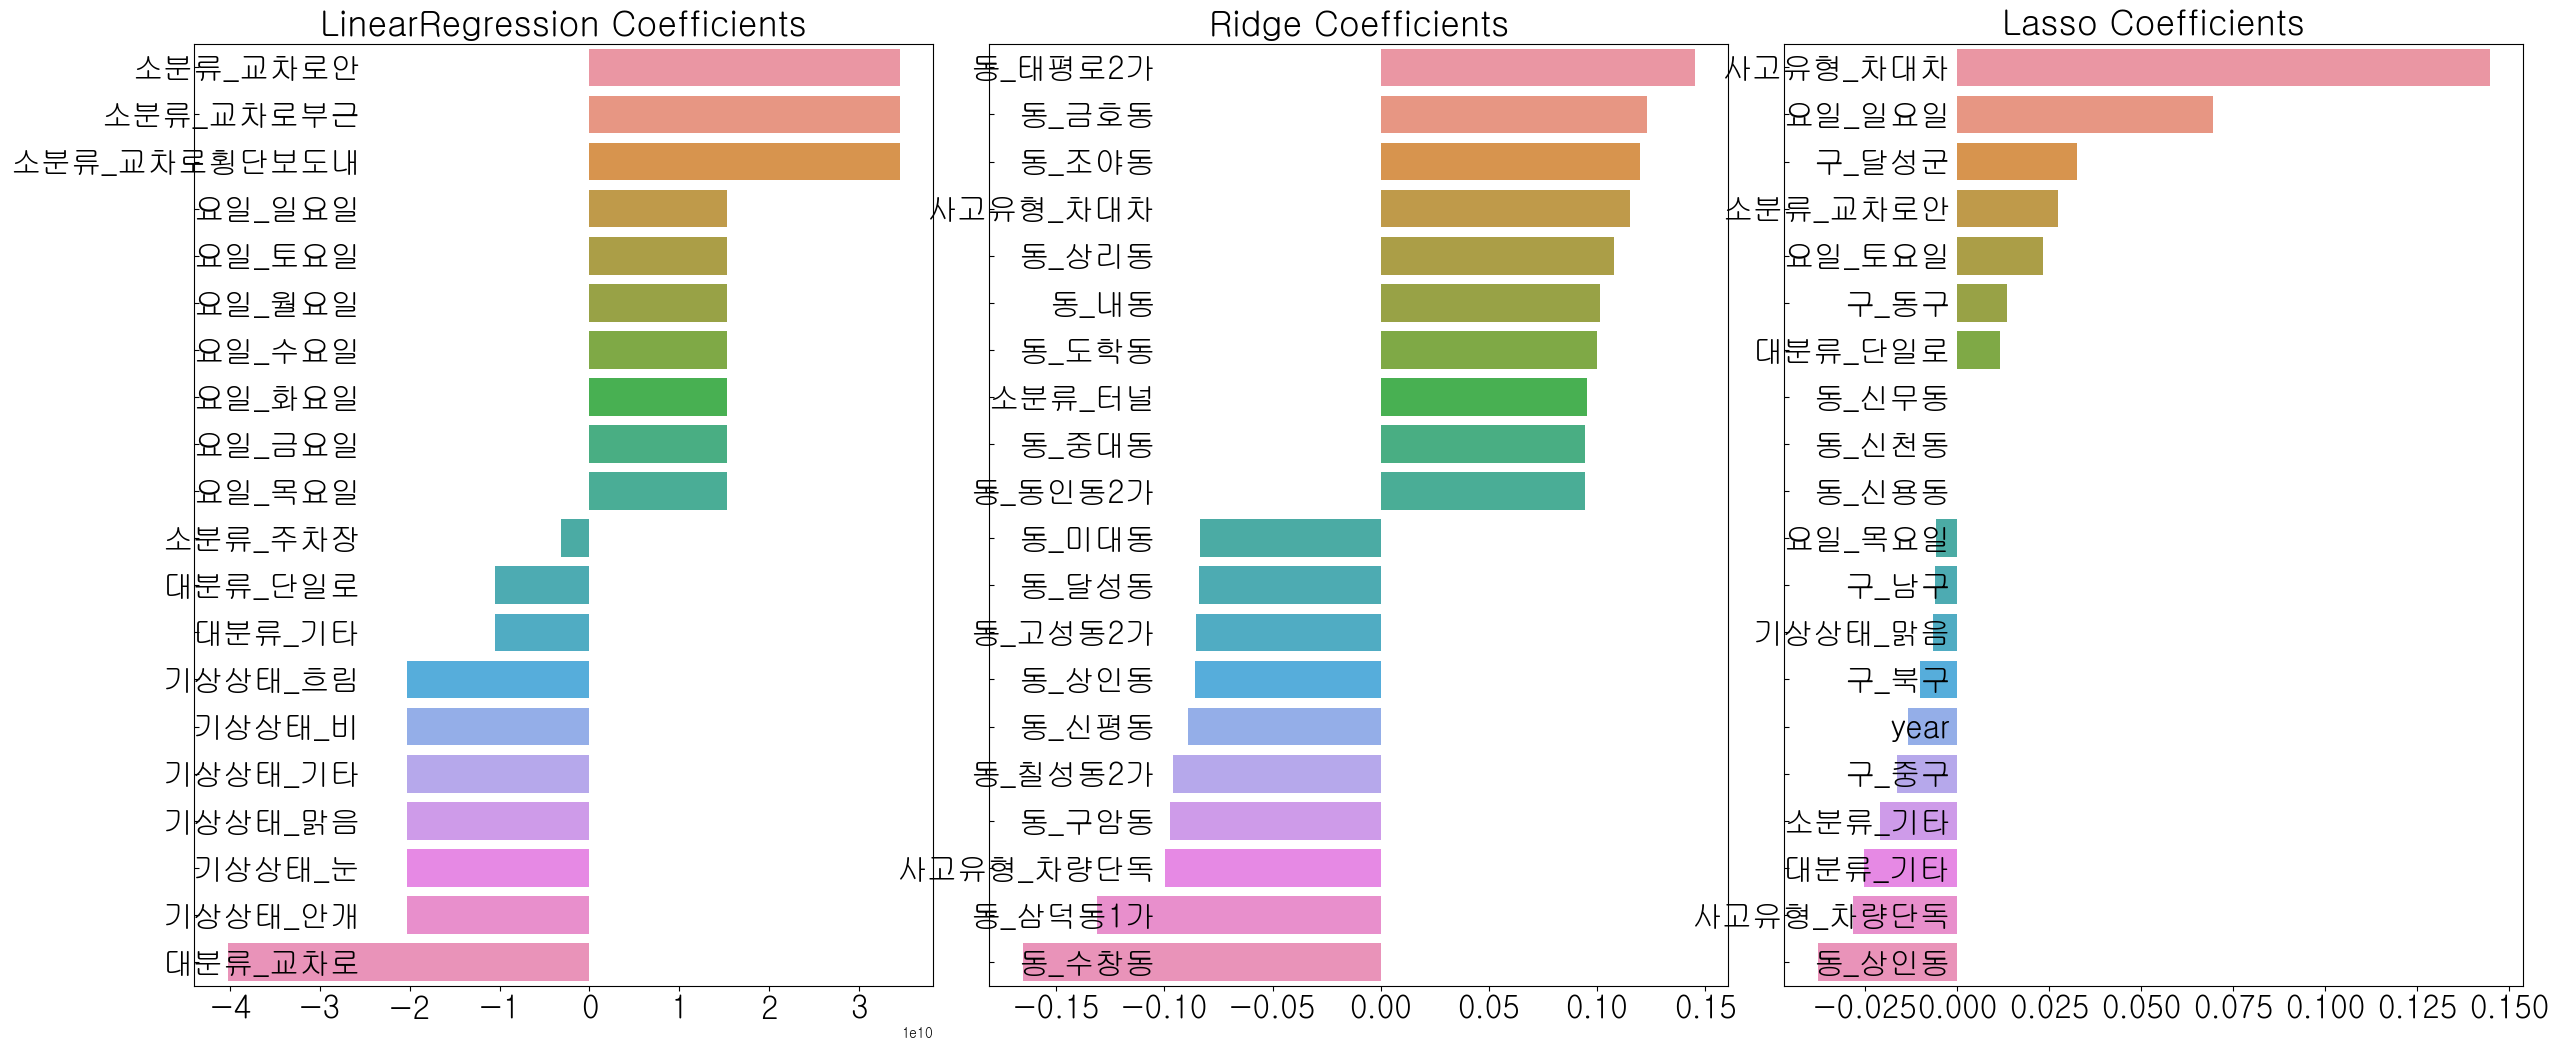

In [43]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg=Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

#모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [47]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값:0.4509, 최적 alpha:{'n_estimators': 1000}


In [51]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
               subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg,lgbm_params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 31687, number of used features: 184
[LightGBM] [Info] Start training from score 1.631876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 31687, number of used features: 183
[LightGBM] [Info] Start training from score 1.632474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [52]:
def visualize_importance(models):
    #2개의 회귀트리 모델의 시각화를 위헤 2개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출해 회귀트리 중요도시각화
    # models 리스트에 있는 모든 회귀 트리모델을 순회합니다.
    for i_num, model in enumerate(models):
        feature_series = pd.Series(data=model.feature_importances_, index=X_train.columns)
        feature_series = feature_series.sort_values(ascending=False)[:20]

        # 각 모델에 대한 subplot의 제목을 설정합니다. 
        # 모델의 클래스 이름을 가져와서 제목으로 사용하고, 제목의 크기를 25로 설정합니다.
        axs[i_num].set_title(model.__class__.__name__+' importance', size=25)

        # y축의 눈금 설정을 조정합니다. 눈금의 방향을 안으로('in') 설정하고, 눈금 레이블의 위치를 조정하기 위해 pad 값을 -120으로 설정합니다.
        axs[i_num].tick_params(axis='y', direction="in", pad=-120)

        # x축과 y축의 눈금 레이블의 폰트 크기를 조정합니다.
        # get_xticklabels()와 get_yticklabels() 함수를 사용하여 각각의 레이블을 가져온 후, 폰트 크기를 22로 설정합니다.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)

        # seaborn의 barplot을 사용하여 회귀 계수를 막대 그래프로 표현합니다.
        # x축에는 계수의 값, y축에는 계수의 이름(인덱스)를 표시합니다. ax=axs[i_num]을 통해 해당 subplot에 그래프를 그립니다.
        sns.barplot(x=feature_series.values, y=feature_series.index, ax=axs[i_num])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 27726, number of used features: 181
[LightGBM] [Info] Start training from score 1.635743


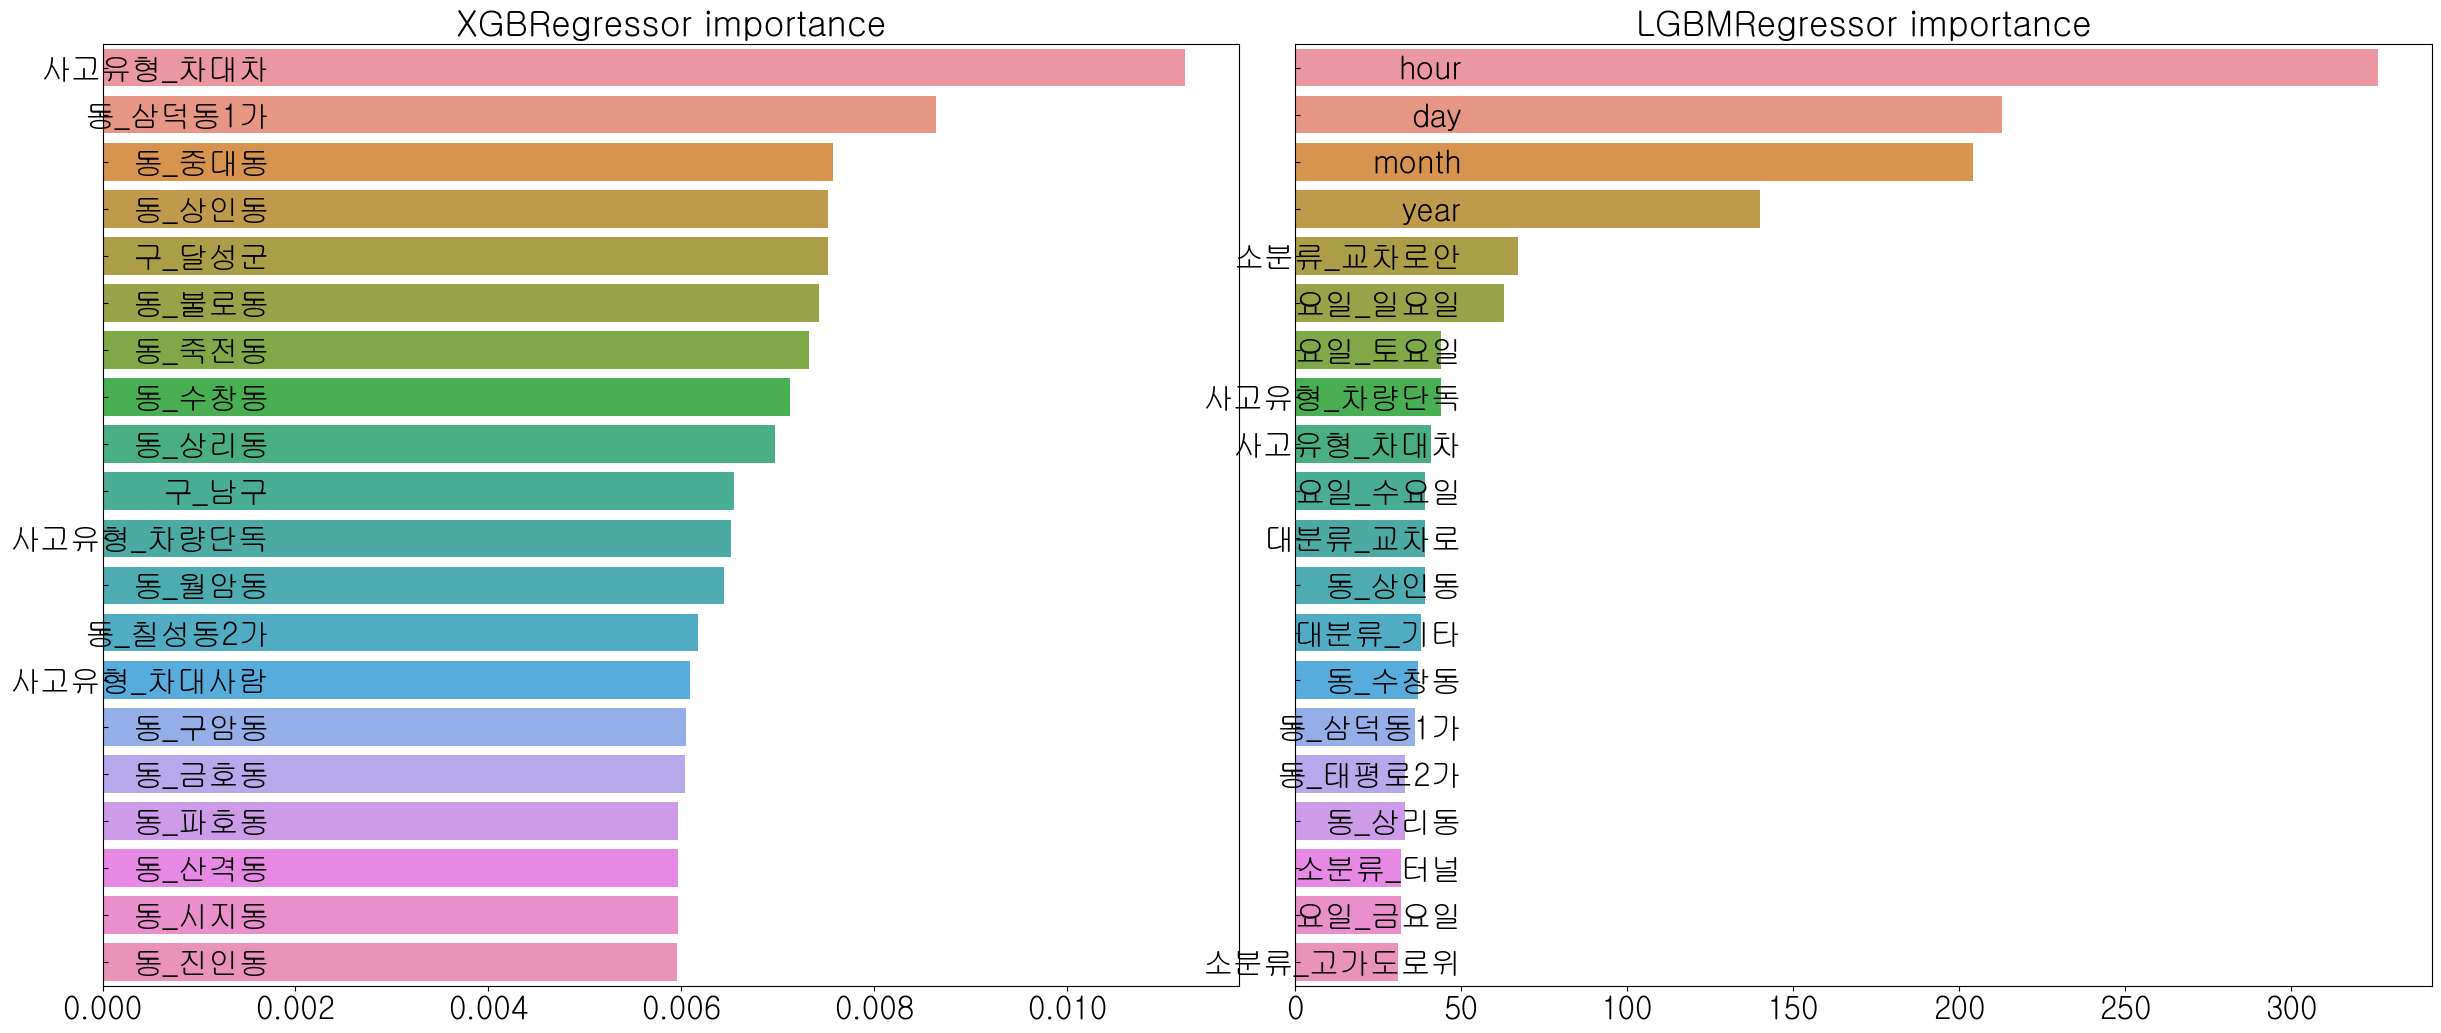

In [53]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
               subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

models = [xgb_reg, lgbm_reg]
visualize_importance(models)

In [54]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value =preds[key]
        mse=mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0}모델의 RMSE:{1}'.format(key,rmse))
        
#개별모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
#개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

#개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 *lasso_pred
preds = {'최종혼합':pred,
        'Ridge':ridge_pred,
        'Lasso': lasso_pred}

#최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종혼합모델의 RMSE:0.44560369206668504
Ridge모델의 RMSE:0.4463871550509299
Lasso모델의 RMSE:0.4460870716445174


In [55]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                      colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                        subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred=xgb_reg.predict(X_test)
lgbm_pred=lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종혼합':pred,
        'XGBM':xgb_pred,
        'LGBM':lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 27726, number of used features: 181
[LightGBM] [Info] Start training from score 1.635743
최종혼합모델의 RMSE:0.4468490287460515
XGBM모델의 RMSE:0.4512395347854633
LGBM모델의 RMSE:0.44560498737151344


In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    #지정된  n_folds값으로 KFold 생성
    kf = KFold(n_splits = n_folds, shuffle=False)
    #추후에 메타모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작')
    
    for folder_counter,(train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :]=model.predict(X_te).reshape(-1,1)
        # 입력된 웡본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter]=model.predict(X_test_n)
        
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    #train_fold_pred 는 최종 메타모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [57]:
#get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반 모델이 생성한 학습용/ 테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg,  X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg,  X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg,  X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg,  X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
Lasso model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBRegressor model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMRegressor model 시작
	 폴드 세트: 0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 22180, number of used features: 174
[LightGBM] [Info] Start training from score 1.635257
	 폴드 세트: 1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Numb

In [58]:
# 개별 모델이 반환할 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
# np.concatenate() 함수는 NumPy 라이브러리에서 제공하는 함수로, 배열을 축(axis)을 따라 결합하는데 사용됩니다.
Stack_final_X_train=np.concatenate((ridge_train, lasso_train, xgb_train,lgbm_train), axis=1)
Stack_final_X_test=np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종메타모델은 라쏘 모델을 적용.
meta_model_lasso=Lasso(alpha=0.0005)

# 개별모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타모델 예측 및 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final=meta_model_lasso.predict(Stack_final_X_test)
mse=mean_squared_error(y_test, final)
rmse=np.sqrt(mse)
print('스태킹 회귀 모델의 최종RMSE 값은:', rmse)

스태킹 회귀 모델의 최종RMSE 값은: 0.4453471929430677


In [60]:
import joblib

# 모델 저장
joblib.dump(model, 'your_model.joblib')

# 모델 불러오기
loaded_model = joblib.load('your_model.joblib')

In [63]:
test_data = pd.read_csv('test.csv')

In [64]:
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

In [65]:
final_predictions = meta_model_lasso.predict(Stack_final_X_test)

In [66]:
# 예측 결과를 데이터프레임으로 변환
final_predictions_df = pd.DataFrame({'Predictions': final_predictions})

# 예측 결과를 CSV 파일로 저장
final_predictions_df.to_csv('predictions.csv', index=False)
